In [1]:
import molmap

RDKit WARNING: [17:28:25] Enabling RDKit 2019.09.2 jupyter extensions


## Hyper parameters setting

In [2]:
metric = 'cosine'
method = 'umap'
n_neighbors = 30
min_dist = 0.1

# 1.descriptor map

In [3]:
mp_name = './descriptor.mp'
mp1 = molmap.MolMap(ftype = 'descriptor', metric = metric, flist = [])
mp1.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist)
mp1.save(mp_name) ### save it as a featurizer

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='precomputed',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=30, negative_sample_rate=5, random_state=1,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Thu Jan  9 17:28:28 2020 Finding Nearest Neighbors
Thu Jan  9 17:28:28 2020 Finished Nearest Neighbor Search
Thu Jan  9 17:28:30 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jan  9 17:28:36 2020 Finis

['./descriptor.mp2']

In [4]:
mp1.plot_scatter(htmlpath='./images/')

2020-01-09 17:28:40,282 - INFO - [bidd-molmap] - generate file: ./images/descriptor_1344_cosine_umap_scatter
2020-01-09 17:28:40,376 - INFO - [bidd-molmap] - save html file to ./images/descriptor_1344_cosine_umap_scatter


In [5]:
mp1.plot_grid(htmlpath='./images/')

2020-01-09 17:28:40,444 - INFO - [bidd-molmap] - generate file: ./images/descriptor_1344_cosine_umap_molmap
2020-01-09 17:28:40,494 - INFO - [bidd-molmap] - save html file to ./images/descriptor_1344_cosine_umap_molmap


# 2.fingerprint map

In [6]:
mp_name = 'fingerprint.mp'
bitsinfo = molmap.feature.fingerprint.Extraction().bitsinfo
flist = bitsinfo[bitsinfo.Subtypes.isin(['MACCSFP', 'PharmacoErGFP','PubChemFP'])].IDs.tolist()
mp2 = molmap.MolMap(ftype = 'fingerprint', metric = metric, flist = flist)
mp2.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist)
mp2.save(mp_name) ## save it as a featurizer

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='precomputed',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=30, negative_sample_rate=5, random_state=1,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Thu Jan  9 17:28:43 2020 Finding Nearest Neighbors
Thu Jan  9 17:28:43 2020 Finished Nearest Neighbor Search
Thu Jan  9 17:28:43 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jan  9 17:28:48 2020 Finis

['fingerprint.mp2']

In [7]:
mp2.plot_scatter('./images/')


2020-01-09 17:28:52,913 - INFO - [bidd-molmap] - generate file: ./images/fingerprint_1303_cosine_umap_scatter
2020-01-09 17:28:52,967 - INFO - [bidd-molmap] - save html file to ./images/fingerprint_1303_cosine_umap_scatter


In [8]:
mp2.plot_grid(htmlpath='./images/')

2020-01-09 17:28:53,025 - INFO - [bidd-molmap] - generate file: ./images/fingerprint_1303_cosine_umap_molmap
2020-01-09 17:28:53,086 - INFO - [bidd-molmap] - save html file to ./images/fingerprint_1303_cosine_umap_molmap


# 3.featurizer

In [9]:
smiles1 = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
smiles2 = 'CC(=O)NC1=CC=CC=C1C(O)=O' #N‐acetylanthranilic acid

In [10]:
X1 = mp1.batch_transform([smiles1, smiles2])
X2 = mp2.batch_transform([smiles1, smiles2])

100%|##########| 2/2 [00:00<00:00, 260.26it/s]


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

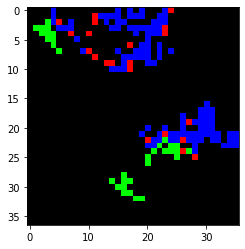

In [12]:
plt.imshow(X2[0])

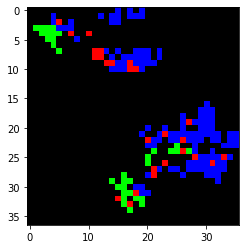

In [13]:
plt.imshow(X2[1])

In [14]:
mp1._S.channels

['Autocorr',
 'Charge',
 'Connectivity',
 'Constitution',
 'Estate',
 'Fragment',
 'InfoContent',
 'Kappa',
 'MOE',
 'Matrix',
 'Path',
 'Property',
 'Topology']

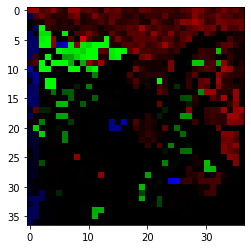

In [15]:
plt.imshow(X1[0][:,:,[0, 4, 9]])

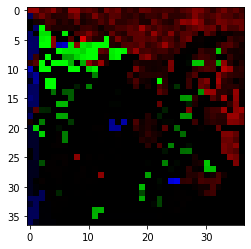

In [16]:
plt.imshow(X1[1][:,:,[0,4, 9]])